In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches

%matplotlib inline

## Read the data

In [65]:
modal_profiles = pd.read_csv('./output/modal_profiles.csv')

x,y = ([] for i in range(2))
for i, row in modal_profiles['lat'].iteritems():
    try:
        if row =='19,27':
            y.append(19.27)
        elif row == ' ':
            y.append(40.7410861)
        else:
            y.append(float(row))
    except ValueError as e:
        print(i, e)
for i, row in modal_profiles['lng'].iteritems():
    if float(row)+180 < 360:
        x.append(float(row)+180)
    else:
        x.append((float(row)+180)-360)

In [66]:
modal_profiles = modal_profiles.drop(columns=["Unnamed: 0"])

In [67]:
line_metadata =  pd.read_csv('./data/line_metadata.csv')
line_metadata = line_metadata.drop(columns='linenum')

## Plot the data

In [68]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot Embellishment

In [71]:
for row in modal_profiles[column_name]:
    print(row)

KeyError: 'label'

[1.   0.77 0.31 0.54 0.   0.08 0.42]


IndexError: list index out of range

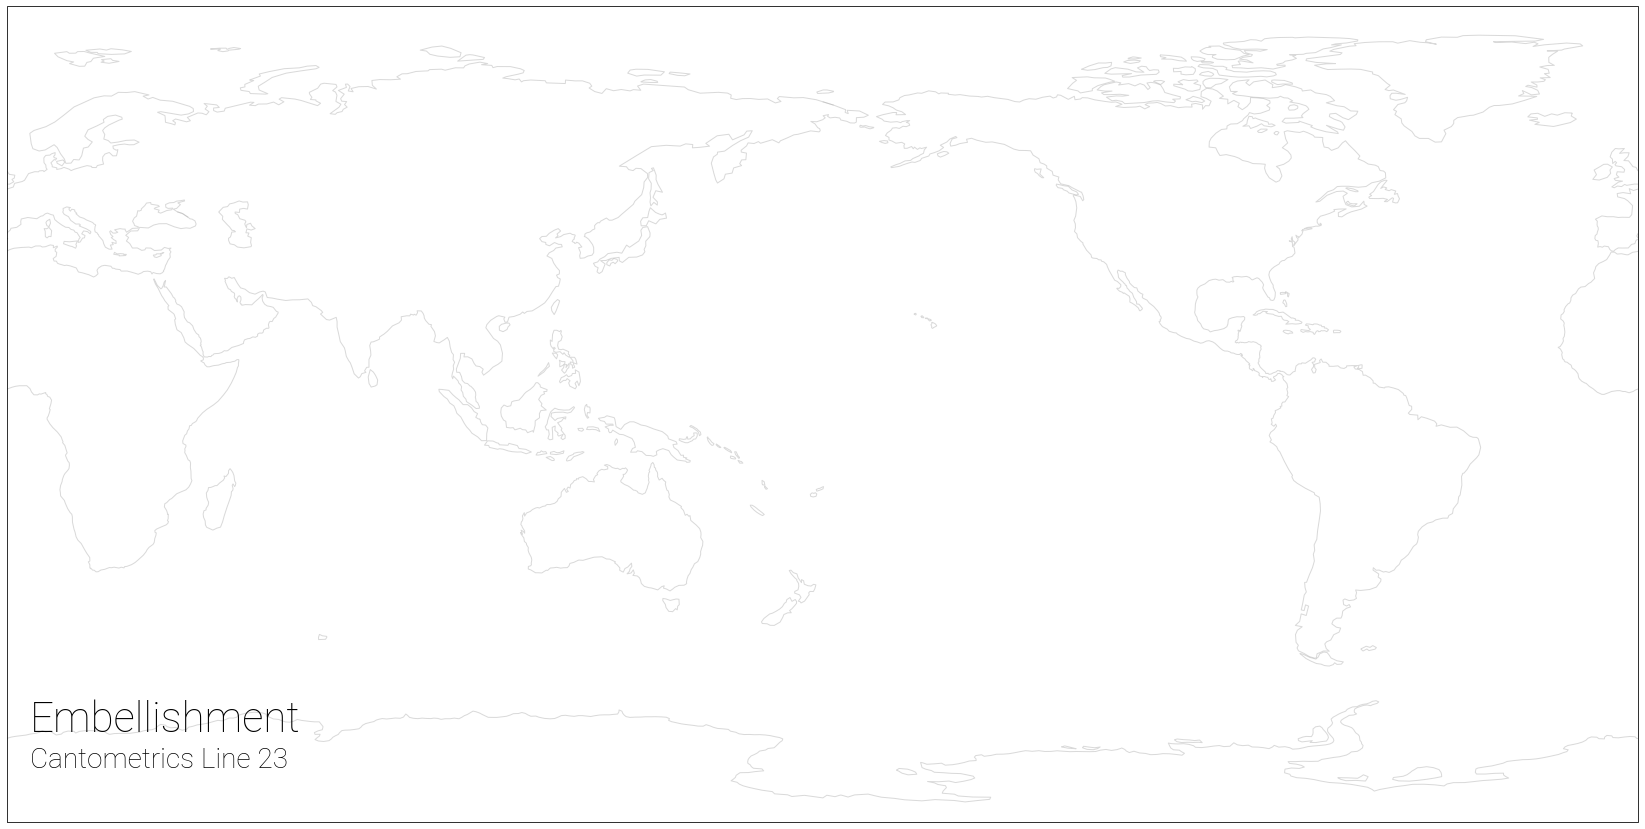

In [69]:
label_names = ["Extreme embellishment", "Much embellishment", 
              "Slight embellishment","Little embellishment", "No embelishment"]

linenum = 23
vname = "Embellishment"

column_name = 'line_'+str(linenum)
color_map = {}
line_title = 'Cantometrics Line '+str(linenum)
variable_name = vname
filename = './figs/'+vname.lower()+'.png'

custom_labels = modal_profiles[column_name].unique()
print(modal_profiles[column_name].unique())
colors = ['#6E44FF', '#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#A373AB']

clon = 180
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180.0))
ax.set_global()
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.text(-175, -70, variable_name, fontsize=42, fontfamily="Roboto", color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily="Roboto", color="Black")
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family='Roboto')

for i, item in enumerate(custom_labels):
    color_map[item] = colors[i]

scatter = ax.scatter(x,  y,
           c=modal_profiles[column_name].apply(lambda x: color_map[x]), 
           cmap="coolwarm_r", 
           alpha=1,
           marker='o')
ax.add_feature(cfeature.OCEAN, alpha=.6, color="#C0E0E6") 

patch_1 = mpatches.Circle((0,0), radius=50, fc='#6E44FF', label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc='#EF476F', label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc='#FFD166', label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc='#06D6A0', label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc='#118AB2', label=label_names[4])
#     patch_6 = mpatches.Circle((0,0), radius=50, fc='#A373AB', label=label_names[5])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 0.6,
                    edgecolor ="none",
                    fontsize=15)

plt.savefig(filename)
plt.show()

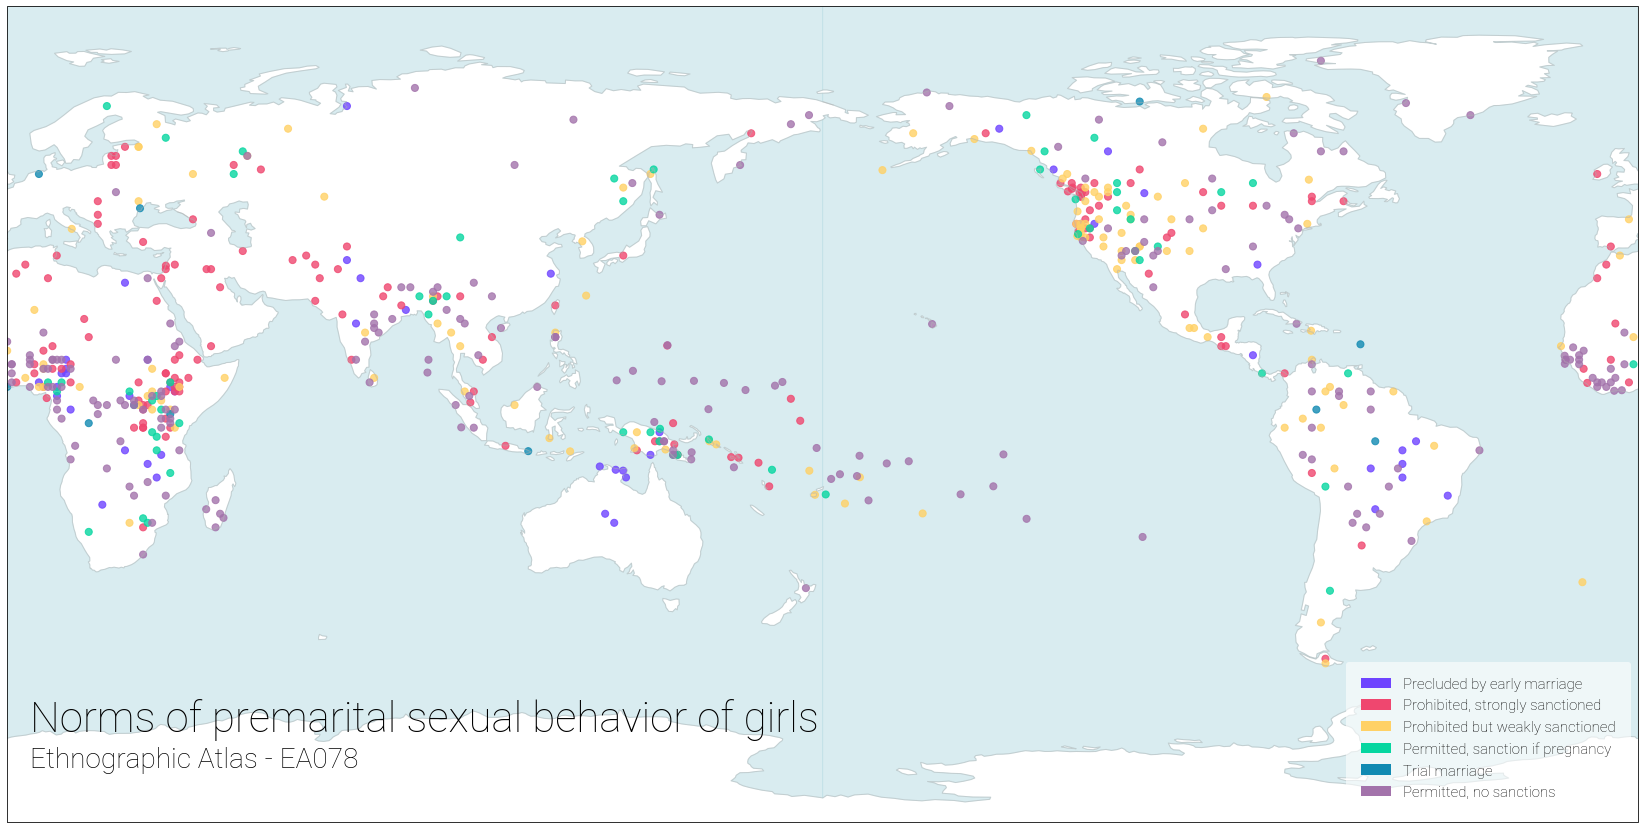

In [70]:
ethnographic =  pd.read_csv('./data/ethnographic-atlas.csv')

variable_name = 'Norms of premarital sexual behavior of girls'
line_title = 'Ethnographic Atlas - EA078'
filename = './figs/'+line_title.replace(' ', '_').replace('_-_','_').lower()+'.png'
column_name = 'label'

color_map = {}
custom_labels = ethnographic[column_name].unique()
colors = ['#6E44FF', '#EF476F', '#FFD166', '#06D6A0', '#118AB2', '#A373AB']

x,y = ([] for i in range(2))

## Latitude and longitude
for i, row in ethnographic['latitude'].iteritems():
    y.append(float(row))
for i, row in ethnographic['longitude'].iteritems():
    if float(row)+180 < 360:
        x.append(float(row)+180)
    else:
        x.append((float(row)+180)-360)
    
    
## Plot settings
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.text(-175, -70, variable_name, fontsize=42, fontfamily="Roboto", color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily="Roboto", color="Black")

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family='Roboto')

for i, item in enumerate(custom_labels):
    color_map[item] = colors[i]
    
scatter = ax.scatter(x,  y,
           c=ethnographic[column_name].apply(lambda x: color_map[x]), 
           alpha=.8,
           s=50,
           label = ethnographic[column_name],
           marker='o')

patch_1 = mpatches.Circle((0,0), radius=50, fc='#6E44FF', label=custom_labels[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc='#EF476F', label=custom_labels[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc='#FFD166', label=custom_labels[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc='#06D6A0', label=custom_labels[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc='#118AB2', label=custom_labels[4])
patch_6 = mpatches.Circle((0,0), radius=50, fc='#A373AB', label=custom_labels[5])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5, patch_6],
                        loc="lower right", 
                        borderpad = 1,
                        framealpha = 0.6,
                        edgecolor ="none",
                        fontsize=15)

ax.add_feature(cfeature.OCEAN, alpha=.6, color="#C0E0E6") 

plt.savefig(filename)
plt.show()

## Plot nasality and Vocal Width

In [93]:
vocal_width = [int(round(row)) for i, row in enumerate(modal_profiles['cv_33'])]
nasality = [int(round(row)) for i, row in enumerate(modal_profiles['cv_34'])]

In [94]:
encoding = []
for i in range(len(vocal_width)):
    if vocal_width[i]==1:
        #wide vocal width
        if nasality[i]==1:
            #low nasality
            encoding.append(1)
        else:
            #high nasality
            encoding.append(2)
    else:
        #narrow vocal width
        if nasality[i]==1:
            #low nasality
            encoding.append(3)
        else:
            #high nasality
            encoding.append(4)

In [ ]:
line_title = 'Cantometrics Lines 33 and 34'
# line 33 is Vocal Width, line 34 is Nasality. 
# This is index 32 and 33 resp because of array indexing
variable_name = line_metadata.loc[32]['varname']+' and '+line_metadata.loc[33]['varname']
filename = './figs/vocal_width_nasality.png'

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.text(-175, -70, line_title, fontsize=42, fontfamily="Roboto", color="Black")
ax.text(-175, -78, variable_name, fontsize=28, fontfamily="Roboto", color="Black")
scatter = ax.scatter(x,  y,
           c=encoding, 
           cmap="Dark2", 
           alpha=1,
           marker='o', sizes=(2,75))
ax.add_feature(cfeature.OCEAN, alpha=.6, color="#C0E0E6") 

light = font_manager.FontProperties(family='Roboto',
                                   weight='light',
                                   style='normal', size=12)

bold = font_manager.FontProperties(family='Roboto',
                                   weight='bold',
                                   style='normal', size=16)

legend = ax.legend(*scatter.legend_elements(), prop=light,
                    loc="upper left")
legend.set_title("   Key", prop=bold)
legend.get_texts()[0].set_text('Wide vocals, low nasality')
legend.get_texts()[1].set_text('Wide vocals, high nasality')
legend.get_texts()[2].set_text('Narrow vocals, low nasality')
legend.get_texts()[3].set_text('Narrow vocals, high nasality')

legend._legend_box.align = "left"
legend._legend_box.pad = 10
ax.add_artist(legend)
plt.savefig(filename)